## Simple Linear Regression
In this notebook, we will experiment with scikit-learn to implement simple linear regression.

The [dataset used](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) is related to fuel consumption and Carbon monoxide emission of cars. 

### Steps For Completion
0) Get a description of the data

1) Split data into training and test sets

2) Create a model using training set

3) Evaluate model using the test set

4) Use model to predict unknown value

In [21]:
# importation of necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### About the Data
The fuel consumption dataset can be found in FuelConsumption.csv. This data contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light vehicles for retail sale in Canada.

Dataset Source -> [here]((https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- MODELYEAR
- MAKE
- MODEL
- VEHICLE CLASS
- ENGINE
- CYLINDERS
- TRANSMISSION
- FUEL CONSUMPTION in CITY(L/100km)
- FUEL CONSUMPTION in HWY(L/100km)
- FUEL CONSUMPTION COMB(L/100km)
- CO2 EMISSIONS (g/km)

In [22]:
# retrieve data
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
# overall summarization of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [24]:
# Retrieve the top 9 rows with the given column (features) names
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


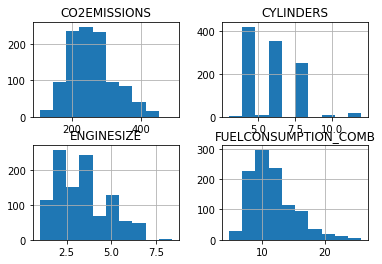

In [25]:
# visualization of the features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

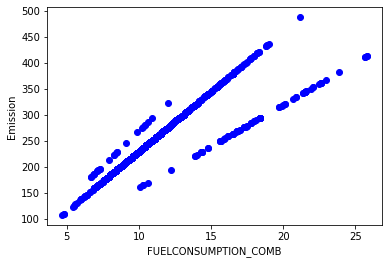

In [26]:
# Compare Fuel Consumption Comb to Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

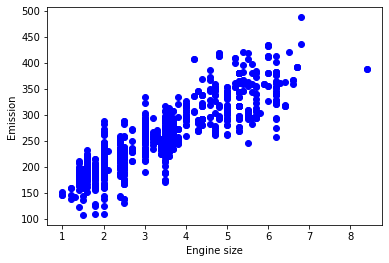

In [27]:
# Compare Engine Size to Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

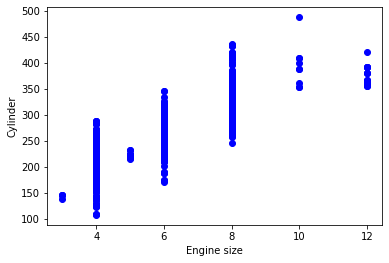

In [28]:
# Compare Cylinders to Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Cylinder")
plt.show()

### Train / Test Split
1. Split dataset into training and testing sets
2. Train model using training set
3. Test model using testing test

Question: Why is this necessary?
This will provide a higher out-of-sample accuracy because the testing dataset is not also a part of the testing data. It is more realistic.

Additionally, the model has not used the testing data to train, therefore knowledge of the outcome of the data points is unknown.

**Note:** When we split the dataset, we will use 80% of the entire data for training, and 20% for testing.

In [29]:
# Select random rows for splitting data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

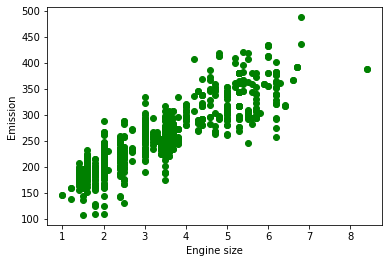

In [30]:
# Train data distribution: Engine size to CO2 Emissions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modeling
We will use sklearn package to model the data.

In [35]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y) # fit line

# Parameters of the fit line
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')

Coefficients: [[38.65539215]]
Intercept: [126.80712229]


Text(0, 0.5, 'Emission')

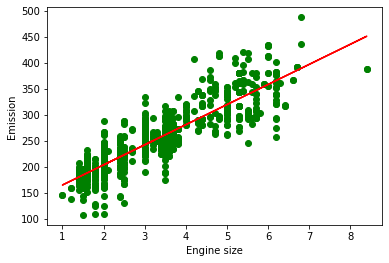

In [37]:
# Plot fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Notice that there appears to be a positive correlation between the engine size and emissions!

### Evaluation
Lastly, compare the actual values to the predicted values and calculate the accuracy of the model. 

#### Model Evaluation Metrics
There are different model evaluation metrics: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

**Note:** We will use MSE here to calculate the accuracy of our model based on the test set

In [40]:
# r2_score determines how close the data is to the fitted regression line
from sklearn.metrics import r2_score

# Testing the model
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = reg.predict(test_x) # predicted value of x

# results
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 24.31
Residual sum of squares (MSE): 1023.45
R2-score: 0.66


## END